 # Demo OPR Model
 This notebook briefly demonstrates some basic analytics using the OPR model
 built in models.py for this project.

In [1]:
from models import OPRModel
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time


 Because this model is generalized, it's trivial to calculate world OPRs for
 all teams. This operation has been optimized significantly, but still takes up
 to 5 minutes.

In [2]:
# Train Model
YEAR = 2019
model = OPRModel()

start = time.time()
data = pd.read_csv(f"../data/{YEAR}_MatchData_ol.csv")
teams, train_data = OPRModel.load(data)
model.train(train_data, train_data.score)

print(f"Time: {int(time.time() - start)} s")
model.table.head(10)


Time: 249 s


,opr
2056,48.121922
1323,43.939395
1678,43.098905
254,40.619511
2910,40.344045
1114,40.205130
364,39.937839
148,39.568454
971,39.102326
5172,38.747564


 We can use this OPR table to visualize the rough distribution of skill in the
 given year.

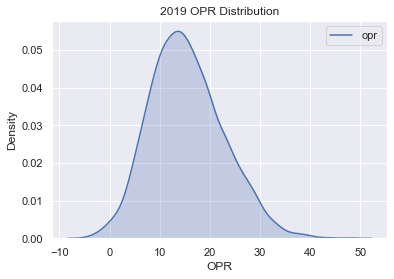

In [3]:
sns.kdeplot(model.table.opr, shade=True)
plt.title(f"{YEAR} OPR Distribution")
plt.xlabel("OPR")
plt.ylabel("Density")
plt.show()


 We know generally that OPRs are most valuable in the scope of a single event,
 where information is less sparse and there are fewer variables. Let's try to
 train the model on event data.

In [4]:
YEAR = 2019
EVENT = "necmp"
FILENAME = f"../data/{YEAR}_MatchData_ol.csv"

event_model = OPRModel()

year_data = pd.read_csv(FILENAME)
event_data = year_data.loc[year_data.Event==EVENT, :]
teams, train_data = OPRModel.load(event_data)
event_model.train(train_data, train_data.score).head()


,opr
195,38.294031
2168,38.022715
125,35.974920
133,34.562795
5687,33.261498


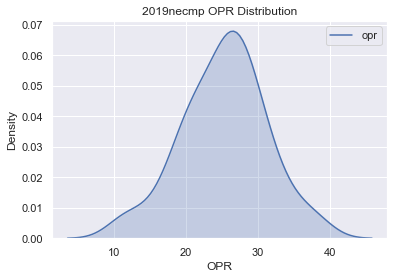

In [5]:
sns.kdeplot(event_model.table.opr, shade=True)
plt.title(f"{YEAR}{EVENT} OPR Distribution")
plt.xlabel("OPR")
plt.ylabel("Density")
plt.show()


 A more conventional analytics technique might be to average together all of a
 team's scoring performances. However, because this metric doesn't account for
 the abilities of their alliance members, we find that it's significantly less
 accurate than the OPR metric.

In [6]:
event_data_6 = pd.read_csv(f"../data/{YEAR}_MatchData.csv")
event_data_6 = event_data_6.loc[event_data_6.Event==EVENT,:]
event_data_6.head(12)


,Key,Year,Event,Week,City,State,Country,Time,Competition Level,Set Number,...,preMatchLevel,rp,sandStormBonusPoints,techFoulCount,teleopPoints,topLeftRocketFar,topLeftRocketNear,topRightRocketFar,topRightRocketNear,totalPoints
67056,2019necmp_f1m1,2019,necmp,7,Worcester,MA,USA,2019-04-13 15:40:21,f,1,...,2.0,0,15,0,85,0,0,5,0,100
67057,2019necmp_f1m1,2019,necmp,7,Worcester,MA,USA,2019-04-13 15:40:21,f,1,...,1.0,0,15,0,85,0,0,5,0,100
67058,2019necmp_f1m1,2019,necmp,7,Worcester,MA,USA,2019-04-13 15:40:21,f,1,...,2.0,0,15,0,85,0,0,5,0,100
67059,2019necmp_f1m1,2019,necmp,7,Worcester,MA,USA,2019-04-13 15:40:21,f,1,...,1.0,0,15,0,76,0,0,0,0,94
67060,2019necmp_f1m1,2019,necmp,7,Worcester,MA,USA,2019-04-13 15:40:21,f,1,...,2.0,0,15,0,76,0,0,0,0,94
67061,2019necmp_f1m1,2019,necmp,7,Worcester,MA,USA,2019-04-13 15:40:21,f,1,...,2.0,0,15,0,76,0,0,0,0,94
67062,2019necmp_f1m2,2019,necmp,7,Worcester,MA,USA,2019-04-13 15:54:37,f,1,...,2.0,0,15,0,38,0,0,0,2,53
67063,2019necmp_f1m2,2019,necmp,7,Worcester,MA,USA,2019-04-13 15:54:37,f,1,...,1.0,0,15,0,38,0,0,0,2,53
67064,2019necmp_f1m2,2019,necmp,7,Worcester,MA,USA,2019-04-13 15:54:37,f,1,...,2.0,0,15,0,38,0,0,0,2,53
67065,2019necmp_f1m2,2019,necmp,7,Worcester,MA,USA,2019-04-13 15:54:37,f,1,...,1.0,0,15,0,66,0,0,0,0,90


In [7]:
team = 195
event_data_6.loc[event_data_6.Team==team, "totalPoints"].mean() / 3


29.270833333333332

 In this event, team 195 (the CyberKnights) have an OPR of 38, but a standard
 mean scoring statistic is only 29--a significant difference in a game that
 generally scored fewer than 100 points.

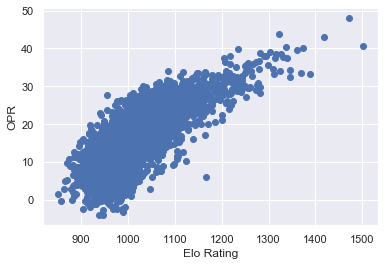

In [8]:
elo_2019 = pd.read_csv(f"data/{YEAR}_end_elos.csv",index_col=0)
elo_2019.head()
combo = pd.concat([elo_2019, model.table], axis=1, join='inner')
plt.scatter(combo.Rating, combo.opr)
plt.xlabel("Elo Rating")
plt.ylabel("OPR")
plt.show()


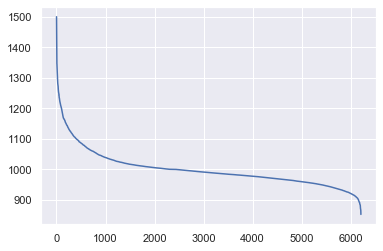

In [9]:
plt.plot(combo.Rank, combo.Rating)
plt.show()


 Because of the way the model is generalized, we can also calculate
 contributions to other metrics, like hatch panels or cargo delivered.

In [10]:
YEAR = 2019
EVENT = "necmp"
FILENAME = f"../data/{YEAR}_MatchData_ol.csv"

panel_model = OPRModel()
cargo_model = OPRModel()

year_data = pd.read_csv(FILENAME)
event_data_6 = pd.read_csv(f"../data/{YEAR}_MatchData.csv")

event_data = year_data.loc[year_data.Event==EVENT, :]
event_data_6 = event_data_6.loc[event_data_6.Event==EVENT,:]

event_data_goals = event_data_6.loc[event_data_6["Robot Number"]==1, ["hatchPanelPoints","cargoPoints"]]

teams, train_data = OPRModel.load(event_data)

panel_model.train(train_data, event_data_goals.hatchPanelPoints)
cargo_model.train(train_data, event_data_goals.cargoPoints)


,opr
4041,15.052872
1768,14.890642
2067,14.371140
3467,14.366820
4761,14.309752
558,13.734180
1058,12.924443
4905,12.541495
238,12.476637
3236,12.100838


 We can visualize this data to see how teams tend to prioritize cargo points
 against panel points. This plot allows us to identify teams with a strong bias
 toward one scoring object or another.

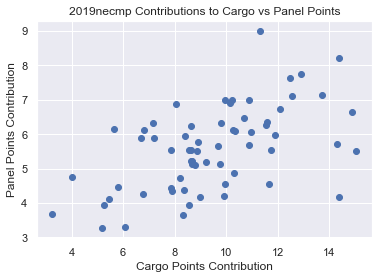

In [11]:
x = cargo_model.table.opr.sort_index()
y = panel_model.table.opr.sort_index()
plt.scatter(x, y)
plt.title(f"{YEAR}{EVENT} Contributions to Cargo vs Panel Points")
plt.xlabel("Cargo Points Contribution")
plt.ylabel("Panel Points Contribution")
plt.show()
